### First pass area definition for the drought study

In [1]:
%who

Interactive namespace is empty.


In [9]:
import numpy as np
import xarray as xr
import pandas as pd
import glob
import matplotlib.pyplot as plt
import pickle

%run -i drought_2017to2019/dataInfo_and_functions.py

import sys
new_path = '/home/566/ad9701/drought_probability/final_code_AU/'
if new_path not in sys.path:
    sys.path.append(new_path)
import validation_functions as myfunc

import geopandas as gpd
import os

In [15]:
import matplotlib.pyplot as plt

TINY_SIZE = 16
SMALL_SIZE = 20
MEDIUM_SIZE = 24
BIGGER_SIZE = 24

plt.rc('font', size=TINY_SIZE)           # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=TINY_SIZE)     # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
data_dir = '/g/data/w97/ad9701/drought_2017to2020/drought_focusArea/'

with open(data_dir + 'annual_rain_below_10perc.pickle', 'rb') as handle:
    annual_rain_below_10perc = pickle.load(handle)
    
with open(data_dir + 'annual_rain_below_15perc.pickle', 'rb') as handle:
    annual_rain_below_15perc = pickle.load(handle)

In [5]:
with open(data_dir + 'mean_count_dry_months_spi_spei.pickle', 'rb') as handle:
    count_dry_spi_spei = pickle.load(handle)
    
with open(data_dir + 'mean_count_dry_months_JJAS_spi_spei.pickle', 'rb') as handle:
    count_dry_spi_spei_JJAS = pickle.load(handle)
    
with open(data_dir + 'JJASseas_rain_15perc.pickle', 'rb') as handle:
    JJAS_rain_below_15perc = pickle.load(handle)

In [6]:
with open(data_dir + 'annual_soil_moisture_below_15perc.pickle', 'rb') as handle:
    annual_sm_below_15perc = pickle.load(handle)
    
with open(data_dir + 'JJASseas_soil_moisture_15perc.pickle', 'rb') as handle:
    JJAS_sm_below_15perc = pickle.load(handle)

In [7]:
data_dir = '/g/data/w97/ad9701/drought_2017to2020/drought_focusArea/'
out_dir = 'figures/drought_2017to2020/drought_area_definition/'

In [8]:
myfunc.draw_pcolormesh_Npanels

<function validation_functions.draw_pcolormesh_Npanels(ds_list, cmap='viridis', levels=None, ncols=5, nrows=2, subplot_title=None, main_title=None, out_dir=None, out_figname=None, fig_format='png', add_cbar=True, cbar_extend='both', cbar_label='', panel_width=3.66, panel_height=4, xticks=array([115, 125, 135, 145]), yticks=array([-40, -35, -30, -25, -20, -15]), shapefile=None, shapefile_color='black', sh_lwd=2, ds_hatch_list=None, hatches=['..', '..'], hatch_zorder=1)>

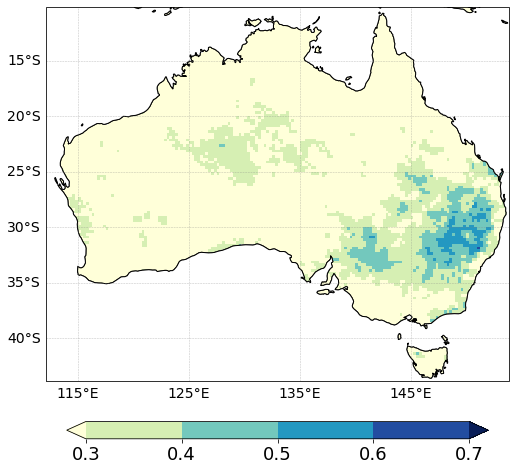

In [8]:
levels = [0.3, 0.4, 0.5, 0.6, 0.7]
plot_list = [count_dry_spi_spei/(12*3)]
cmap = 'YlGnBu'
ncols = 1
nrows = 1

myfunc.draw_pcolormesh_Npanels(ds_list = plot_list, cmap = cmap, levels = levels, ncols = ncols, nrows = nrows, panel_width=3.66*2, panel_height=4*2)

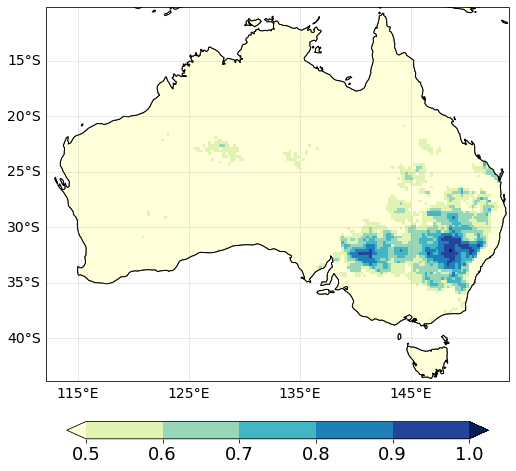

In [11]:
levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
plot_list = [count_dry_spi_spei_JJAS/(4*3)]
myfunc.draw_pcolormesh_Npanels(ds_list = plot_list, cmap = cmap, levels = levels, ncols = ncols, nrows = nrows, panel_width=3.66*2, panel_height=4*2)

In [14]:
%who

BIGGER_SIZE	 JJAS_rain_below_15perc	 LATITUDE_FORMATTER	 LONGITUDE_FORMATTER	 MEDIUM_SIZE	 SMALL_SIZE	 TINY_SIZE	 add_cyclic_point	 agcd_info	 
alldata_dict	 annual_rain_below_10perc	 annual_rain_below_15perc	 awra_info	 ccrs	 cfeature	 chirps_info	 cmap	 count_dry_spi_spei	 
count_dry_spi_spei_JJAS	 cticker	 data_dir	 draw_spatial_plot	 draw_spatial_plot_12panels	 draw_spatial_plot_3panels	 draw_spatial_plot_addcontours	 draw_spatial_plot_addsh	 esacci_info	 
get_da	 gleam_info	 glob	 gpd	 handle	 levels	 mswep_info	 mticker	 myfunc	 
ncols	 new_path	 np	 nrows	 out_dir	 pd	 pickle	 plot_list	 plt	 
regrid_all_from_list	 save_monthly_data	 sys	 xe	 xr	 


In [15]:
JJAS_rain_below_15perc

<xarray.DataArray 'count' (lat: 136, lon: 168)>
dask.array<mean_agg-aggregate, shape=(136, 168), dtype=float64, chunksize=(136, 168), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 112.1 112.4 112.6 112.9 ... 153.1 153.4 153.6 153.9
  * lat      (lat) float64 -10.12 -10.38 -10.62 -10.88 ... -43.38 -43.62 -43.88
Attributes:
    description:  Mean count of 2017-19 JJAS season rain < 15th percentile. B...

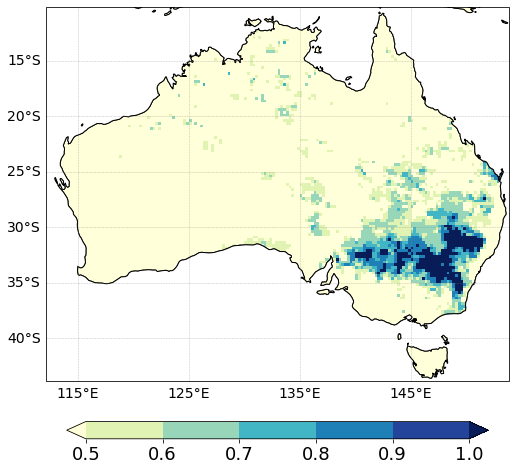

In [16]:
levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
plot_list = [JJAS_rain_below_15perc/3]
myfunc.draw_pcolormesh_Npanels(ds_list = plot_list, cmap = cmap, levels = levels, ncols = ncols, nrows = nrows, panel_width=3.66*2, panel_height=4*2)

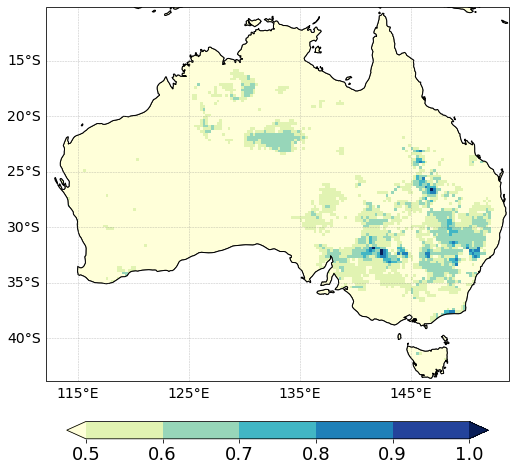

In [17]:
levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
plot_list = [annual_rain_below_15perc/3]
myfunc.draw_pcolormesh_Npanels(ds_list = plot_list, cmap = cmap, levels = levels, ncols = ncols, nrows = nrows, panel_width=3.66*2, panel_height=4*2)

In [50]:
draw_spatial_plot

<function __main__.draw_spatial_plot(ds, cmap, levels, main_title=None, out_dir=None, out_figname=None, add_cbar=True, cbar_label='')>

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


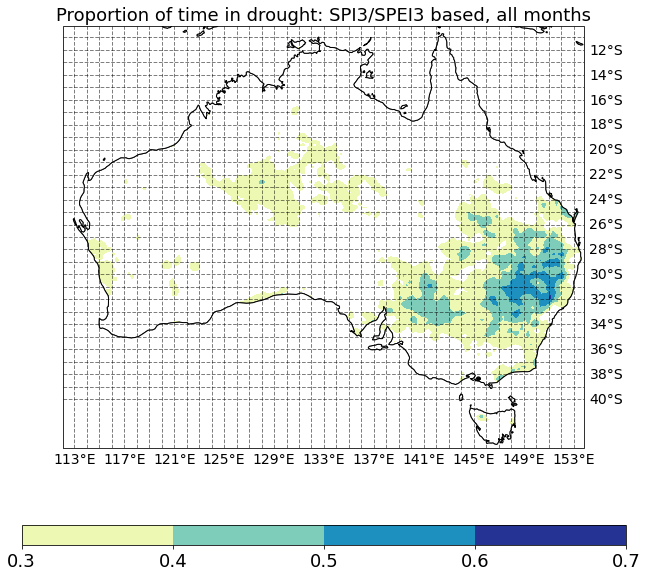

In [52]:
levels = [0.3, 0.4, 0.5, 0.6, 0.7]
draw_spatial_plot(count_dry_spi_spei/(12*3), cmap='YlGnBu', levels=levels, main_title='Proportion of time in drought: SPI3/SPEI3 based, all months', 
                  out_dir = out_dir, out_figname='mean_proportion_spi_spei_based_all_months.png')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


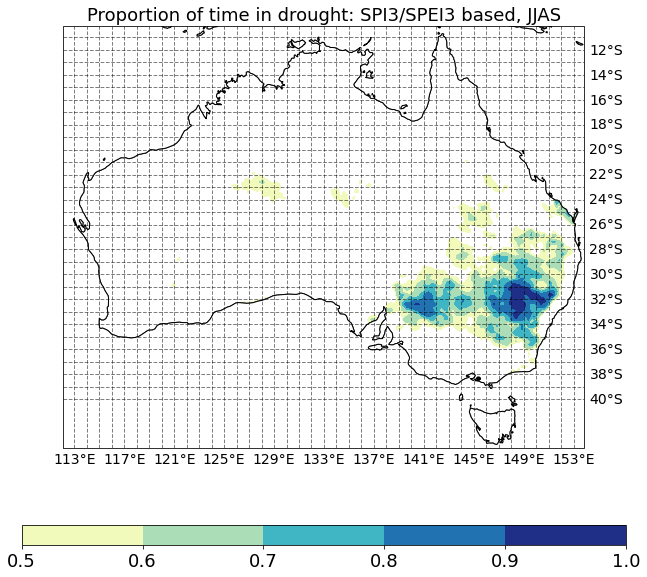

In [53]:
levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
draw_spatial_plot(count_dry_spi_spei_JJAS/(4*3), cmap='YlGnBu', levels=levels, main_title='Proportion of time in drought: SPI3/SPEI3 based, JJAS', 
                  out_dir = out_dir, out_figname='mean_proportion_spi_spei_based_JJAS.png')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


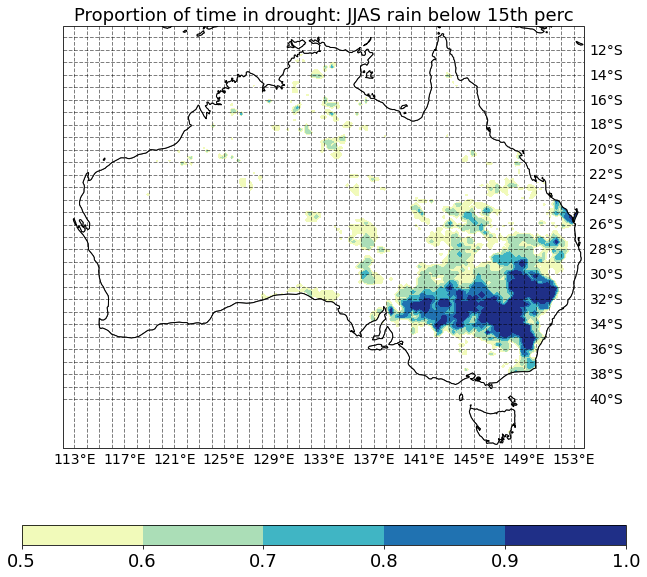

In [54]:
levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
draw_spatial_plot(JJAS_rain_below_15perc/3, cmap='YlGnBu', levels=levels, main_title='Proportion of time in drought: JJAS rain below 15th perc', 
                  out_dir = out_dir, out_figname='JJAS_rain_below_15_perc.png')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


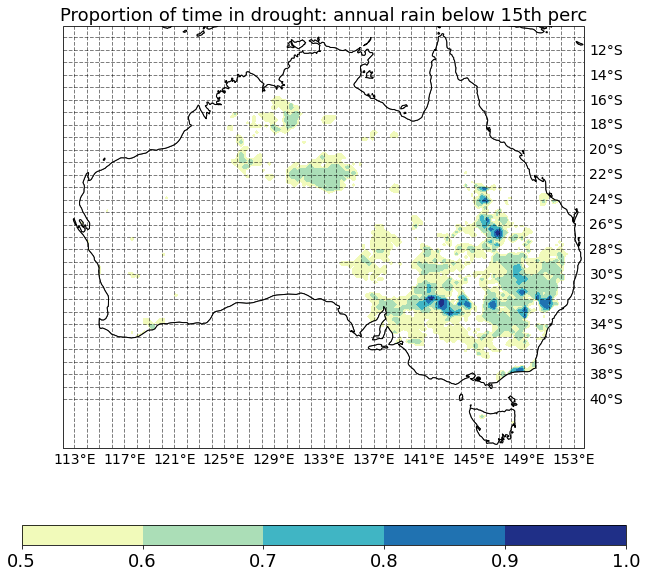

In [55]:
levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
draw_spatial_plot(annual_rain_below_15perc/3, cmap='YlGnBu', levels=levels, main_title='Proportion of time in drought: annual rain below 15th perc', 
                  out_dir = out_dir, out_figname='annual_rain_below_15_perc.png')

In [1]:
# Import necessary modules first
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Create an empty geopandas GeoDataFrame
newdata = gpd.GeoDataFrame()

# Let's see what we have at the moment
print(newdata)

# Create a new column called 'geometry' to the GeoDataFrame
newdata['geometry'] = None

# Let's again see what's inside
print(newdata)

# Coordinates in Decimal Degrees
coordinates = [(152, -25), 
               (152, -35), 
               (139, -35), 
               (139, -30),
              (144, -25)]

# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)

# Let's see what we have
print(poly)

# Insert the polygon into 'geometry' -column at index 0
newdata.loc[0, 'geometry'] = poly

# Let's see what we have now
print(newdata)

# Add a new column and insert data
newdata.loc[0, 'location'] = 'Region in drought'

# Let's check the data
print(newdata)

print(newdata.crs)

# Import specific function 'from_epsg' from fiona module
from fiona.crs import from_epsg

# Set the GeoDataFrame's coordinate system to WGS84 (i.e. epsg code 4326)
newdata.crs = from_epsg(4326)

# Let's see how the crs definition looks like
print(newdata.crs)

# Determine the output path for the Shapefile
outfp = "/g/data/w97/ad9701/test.shp"

# Write the data into that Shapefile
newdata.to_file(outfp)

Empty GeoDataFrame
Columns: []
Index: []
Empty GeoDataFrame
Columns: [geometry]
Index: []
POLYGON ((152 -25, 152 -35, 139 -35, 139 -30, 144 -25, 152 -25))
                                            geometry
0  POLYGON ((152.00000 -25.00000, 152.00000 -35.0...
                                            geometry           location
0  POLYGON ((152.00000 -25.00000, 152.00000 -35.0...  Region in drought
None
+init=epsg:4326 +no_defs +type=crs


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


### Option 1

In [28]:
# Import necessary modules first
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Create an empty geopandas GeoDataFrame
newdata = gpd.GeoDataFrame()

# Let's see what we have at the moment
print(newdata)

# Create a new column called 'geometry' to the GeoDataFrame
newdata['geometry'] = None

# Let's again see what's inside
print(newdata)

# Coordinates in Decimal Degrees
coordinates = [(152, -25), 
               (152, -35), 
               (139, -35), 
               (139, -30),
              (144, -25)]

# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)

# Let's see what we have
print(poly)

# Insert the polygon into 'geometry' -column at index 0
newdata.loc[0, 'geometry'] = poly

# Let's see what we have now
print(newdata)

# Add a new column and insert data
newdata.loc[0, 'location'] = 'Region in drought'

# Let's check the data
print(newdata)

print(newdata.crs)

# Import specific function 'from_epsg' from fiona module
from fiona.crs import from_epsg

# Set the GeoDataFrame's coordinate system to WGS84 (i.e. epsg code 4326)
newdata.crs = from_epsg(4326)

# Let's see how the crs definition looks like
print(newdata.crs)

# Determine the output path for the Shapefile
outfp = "/g/data/w97/ad9701/drought_2017to2020/drought_focusArea/drought_focusArea_option1.shp"

# Write the data into that Shapefile
newdata.to_file(outfp)

Empty GeoDataFrame
Columns: []
Index: []
Empty GeoDataFrame
Columns: [geometry]
Index: []
POLYGON ((152 -25, 152 -35, 139 -35, 139 -30, 144 -25, 152 -25))
                                            geometry
0  POLYGON ((152.00000 -25.00000, 152.00000 -35.0...
                                            geometry           location
0  POLYGON ((152.00000 -25.00000, 152.00000 -35.0...  Region in drought
None
+init=epsg:4326 +no_defs +type=crs


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [5]:
# Import necessary modules first
import geopandas as gpd
from shapely.geometry import Point, Polygon
# Import specific function 'from_epsg' from fiona module
from fiona.crs import from_epsg

def create_polygon_shapefile(coordinates, location, outfile):
    '''
    coordinates: list containing tuples of (lon, lat) edges of the polygon *note*: lon first
    location: string; name of the polygon
    outfile: output shapefile path and name
    '''

    # Create an empty geopandas GeoDataFrame
    newdata = gpd.GeoDataFrame()
    # Create a new column called 'geometry' to the GeoDataFrame
    newdata['geometry'] = None
    # Coordinates in Decimal Degrees
    coordinates = coordinates
    # Create a Shapely polygon from the coordinate-tuple list
    poly = Polygon(coordinates)
    # Insert the polygon into 'geometry' -column at index 0
    newdata.loc[0, 'geometry'] = poly
    # Add a new column and insert data
    newdata.loc[0, 'location'] = location

    # Set the GeoDataFrame's coordinate system to WGS84 (i.e. epsg code 4326)
    newdata.crs = from_epsg(4326)
    # Determine the output path for the Shapefile
    outfp = outfile
    # Write the data into that Shapefile
    newdata.to_file(outfp)
    return None

### Option 2

In [30]:
coordinates = [(152, -25), 
               (152, -32), 
               (149, -35), 
               (142, -35),
              (138, -33),
              (144, -25)]
location = 'Region in drought'
outfile = "/g/data/w97/ad9701/drought_2017to2020/drought_focusArea/drought_focusArea_option2.shp"
create_polygon_shapefile(coordinates = coordinates, location = location, outfile = outfile)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
coordinates = [(152, -25), 
               (152, -32), 
               (149, -35), 
               (142, -35),
              (138, -33),
              (144, -25)]
location = 'Region in drought'
outfile = "/g/data/w97/ad9701/test.shp"
create_polygon_shapefile(coordinates = coordinates, location = location, outfile = outfile)

### Option 3

In [10]:
# Import necessary modules first
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Create an empty geopandas GeoDataFrame
newdata = gpd.GeoDataFrame()

# Let's see what we have at the moment
print(newdata)

# Create a new column called 'geometry' to the GeoDataFrame
newdata['geometry'] = None

# Let's again see what's inside
print(newdata)

# Coordinates in Decimal Degrees
coordinates = [(152, -25), 
               (152, -32), 
               (150, -36), 
               (142, -35),
              (138, -33),
              (144, -25)]

# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)

# Let's see what we have
print(poly)

# Insert the polygon into 'geometry' -column at index 0
newdata.loc[0, 'geometry'] = poly

# Let's see what we have now
print(newdata)

# Add a new column and insert data
newdata.loc[0, 'location'] = 'Region in drought'

# Let's check the data
print(newdata)

print(newdata.crs)

# Import specific function 'from_epsg' from fiona module
from fiona.crs import from_epsg

# Set the GeoDataFrame's coordinate system to WGS84 (i.e. epsg code 4326)
newdata.crs = from_epsg(4326)

# Let's see how the crs definition looks like
print(newdata.crs)

# Determine the output path for the Shapefile
outfp = "/g/data/w97/ad9701/drought_2017to2020/drought_focusArea/drought_focusArea_option3.shp"

# Write the data into that Shapefile
newdata.to_file(outfp)

Empty GeoDataFrame
Columns: []
Index: []
Empty GeoDataFrame
Columns: [geometry]
Index: []
POLYGON ((152 -25, 152 -32, 150 -36, 142 -35, 138 -33, 144 -25, 152 -25))
                                            geometry
0  POLYGON ((152.00000 -25.00000, 152.00000 -32.0...
                                            geometry           location
0  POLYGON ((152.00000 -25.00000, 152.00000 -32.0...  Region in drought
None
+init=epsg:4326 +no_defs +type=crs


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot:>

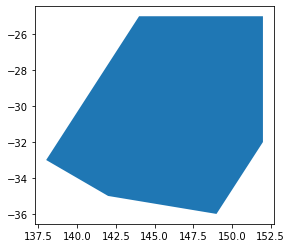

In [3]:
# Read file using gpd.read_file()
data = gpd.read_file(outfp)
#%matplotlib inline
data.plot() #aspect=1)

<AxesSubplot:>

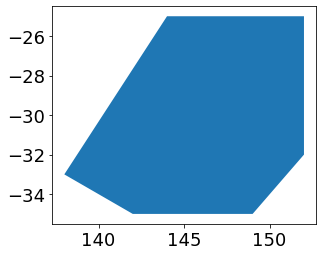

In [31]:
data = gpd.read_file(outfile)
data.plot() #aspect=1)

In [15]:
outfp

'/g/data/w97/ad9701/drought_2017to2020/drought_focusArea/drought_focusArea.shp'

In [33]:
%who

BIGGER_SIZE	 JJAS_rain_below_15perc	 LATITUDE_FORMATTER	 LONGITUDE_FORMATTER	 MEDIUM_SIZE	 Point	 Polygon	 SMALL_SIZE	 TINY_SIZE	 
add_cyclic_point	 agcd_info	 alldata_dict	 annual_rain_below_10perc	 annual_rain_below_15perc	 awra_info	 ccrs	 cfeature	 chirps_info	 
coordinates	 count_dry_spi_spei	 count_dry_spi_spei_JJAS	 create_polygon_shapefile	 cticker	 data	 data_dir	 draw_spatial_plot	 draw_spatial_plot_12panels	 
draw_spatial_plot_3panels	 draw_spatial_plot_addcontours	 draw_spatial_plot_addsh	 from_epsg	 get_da	 gleam_info	 glob	 gpd	 handle	 
levels	 location	 mswep_info	 mticker	 newdata	 np	 outfile	 outfp	 pd	 
pickle	 plt	 poly	 regrid_all_from_list	 save_monthly_data	 sys	 xe	 xr	 


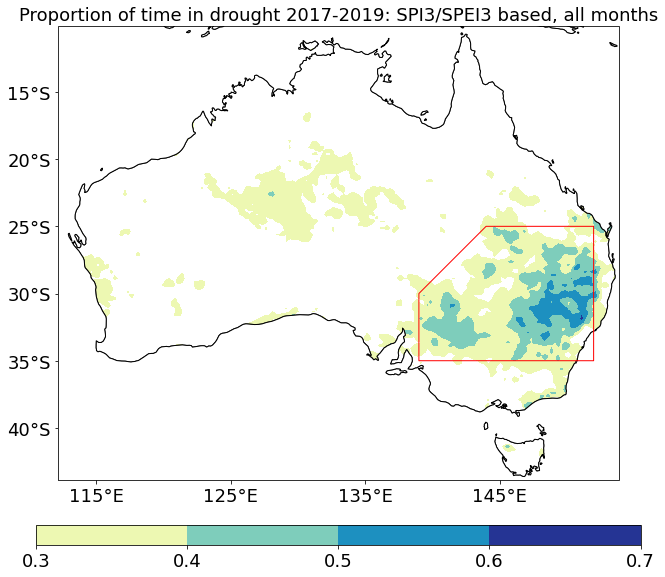

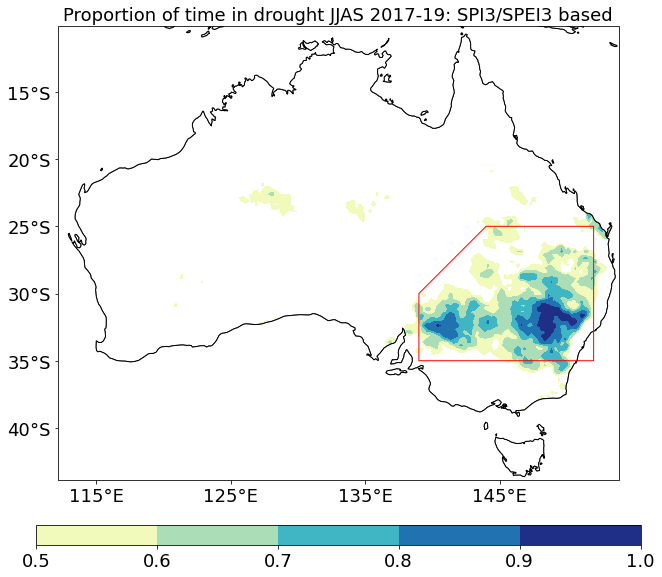

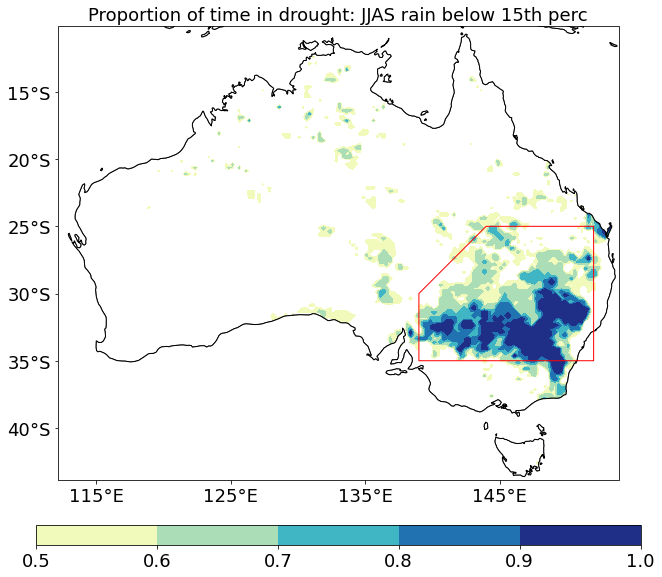

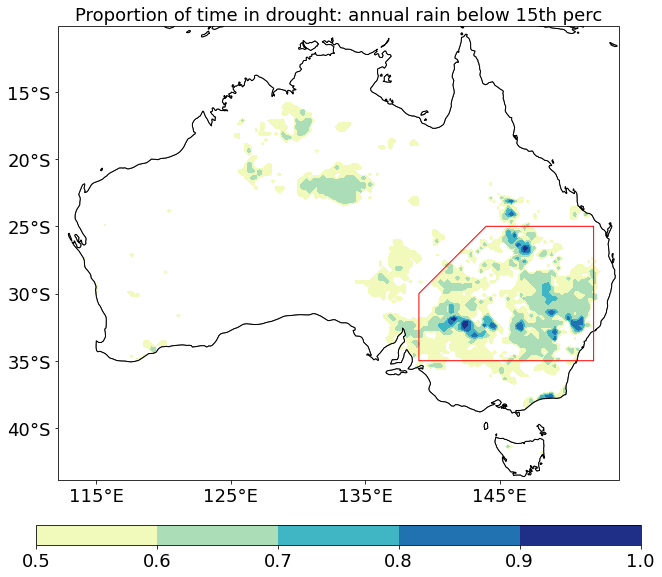

In [34]:
out_dir = 'figures/drought_2017to2020/drought_area_definition/'
levels = [0.3, 0.4, 0.5, 0.6, 0.7]
draw_spatial_plot_addsh(count_dry_spi_spei/(12*3), cmap='YlGnBu', levels=levels, shapefile = outfp, 
                        main_title='Proportion of time in drought 2017-2019: SPI3/SPEI3 based, all months', 
                  out_dir = out_dir, out_figname='mean_proportion_spi_spei_based_all_months_option1.png')
levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
draw_spatial_plot_addsh(count_dry_spi_spei_JJAS/(4*3), cmap='YlGnBu', levels=levels, shapefile = outfp,
                  main_title='Proportion of time in drought JJAS 2017-19: SPI3/SPEI3 based', 
                  out_dir = out_dir, out_figname='mean_proportion_spi_spei_based_JJAS_option1.png')
levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
draw_spatial_plot_addsh(JJAS_rain_below_15perc/3, cmap='YlGnBu', levels=levels, shapefile = outfp,
                  main_title='Proportion of time in drought: JJAS rain below 15th perc', 
                  out_dir = out_dir, out_figname='JJAS_rain_below_15_perc_option1.png')
levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
draw_spatial_plot_addsh(annual_rain_below_15perc/3, cmap='YlGnBu', levels=levels, shapefile = outfp,
                  main_title='Proportion of time in drought: annual rain below 15th perc', 
                  out_dir = out_dir, out_figname='annual_rain_below_15_perc_option1.png')

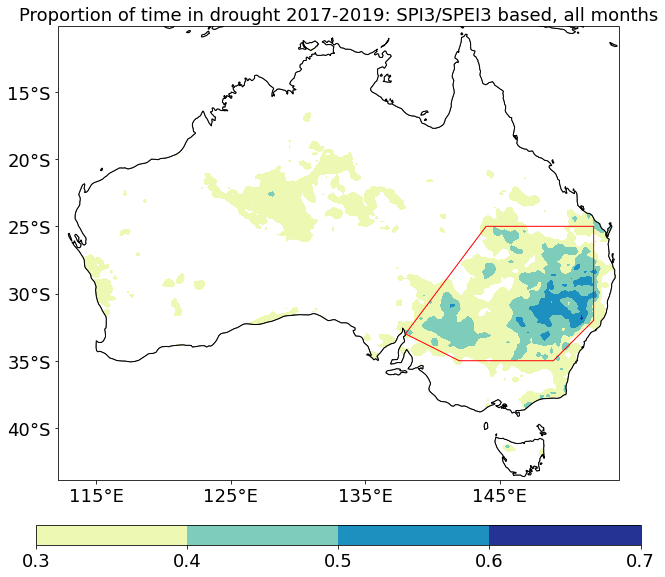

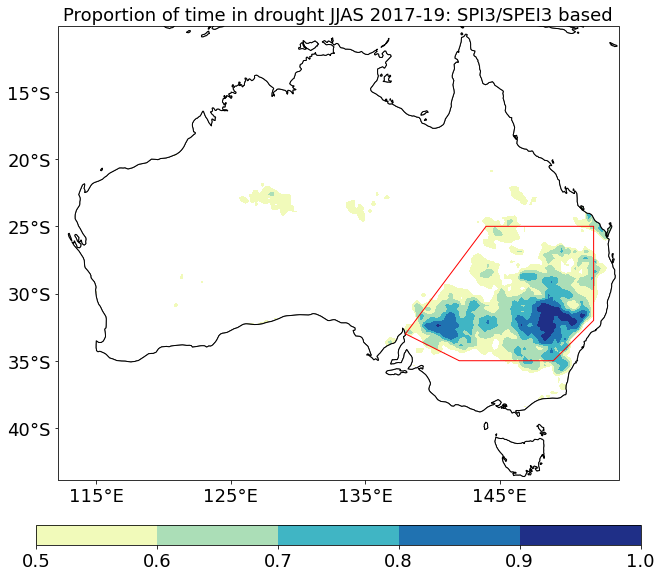

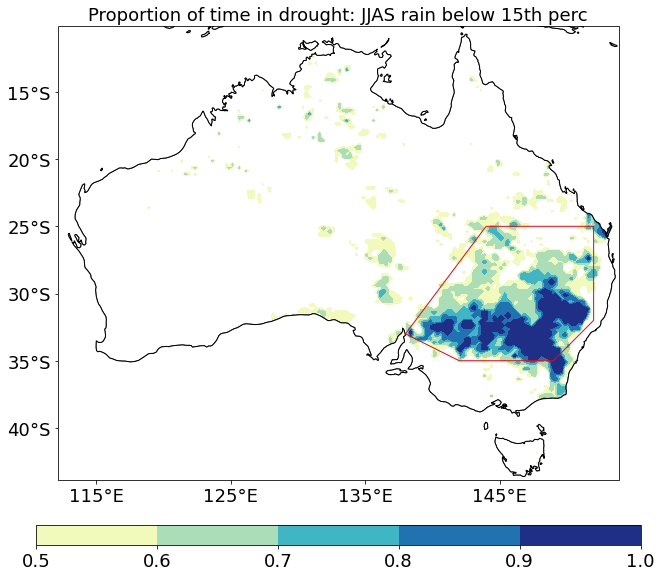

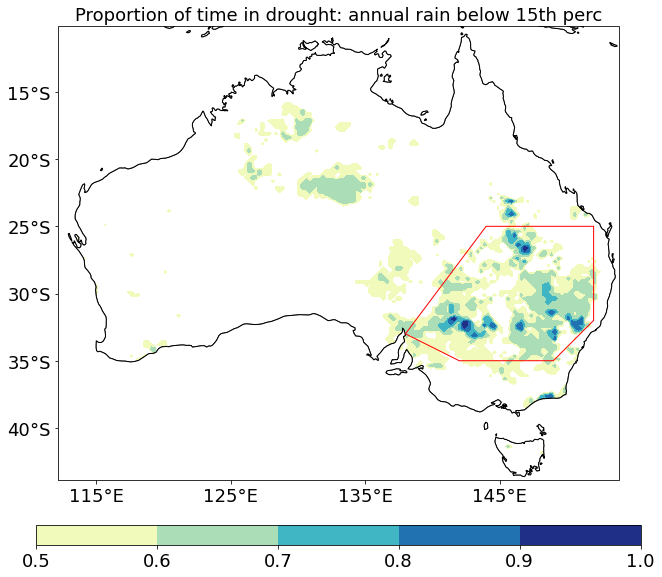

In [35]:
out_dir = 'figures/drought_2017to2020/drought_area_definition/'
levels = [0.3, 0.4, 0.5, 0.6, 0.7]
draw_spatial_plot_addsh(count_dry_spi_spei/(12*3), cmap='YlGnBu', levels=levels, shapefile = outfile, 
                        main_title='Proportion of time in drought 2017-2019: SPI3/SPEI3 based, all months', 
                  out_dir = out_dir, out_figname='mean_proportion_spi_spei_based_all_months_option2.png')
levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
draw_spatial_plot_addsh(count_dry_spi_spei_JJAS/(4*3), cmap='YlGnBu', levels=levels, shapefile = outfile,
                  main_title='Proportion of time in drought JJAS 2017-19: SPI3/SPEI3 based', 
                  out_dir = out_dir, out_figname='mean_proportion_spi_spei_based_JJAS_option2.png')
levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
draw_spatial_plot_addsh(JJAS_rain_below_15perc/3, cmap='YlGnBu', levels=levels, shapefile = outfile,
                  main_title='Proportion of time in drought: JJAS rain below 15th perc', 
                  out_dir = out_dir, out_figname='JJAS_rain_below_15_perc_option2.png')
levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
draw_spatial_plot_addsh(annual_rain_below_15perc/3, cmap='YlGnBu', levels=levels, shapefile = outfile,
                  main_title='Proportion of time in drought: annual rain below 15th perc', 
                  out_dir = out_dir, out_figname='annual_rain_below_15_perc_option2.png')

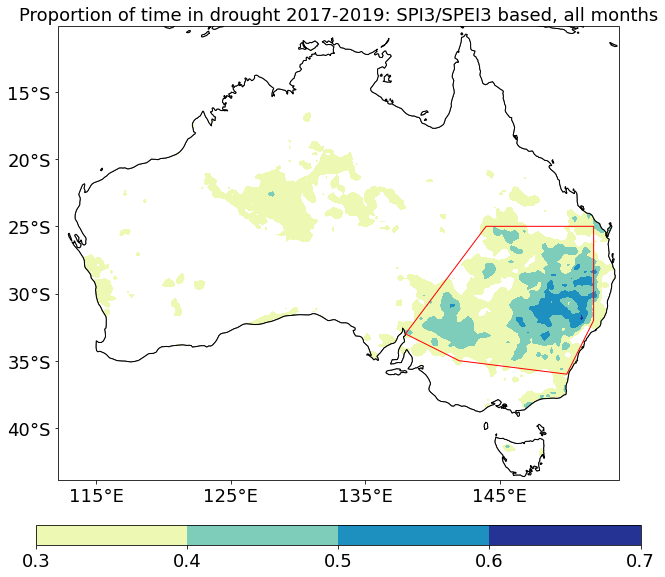

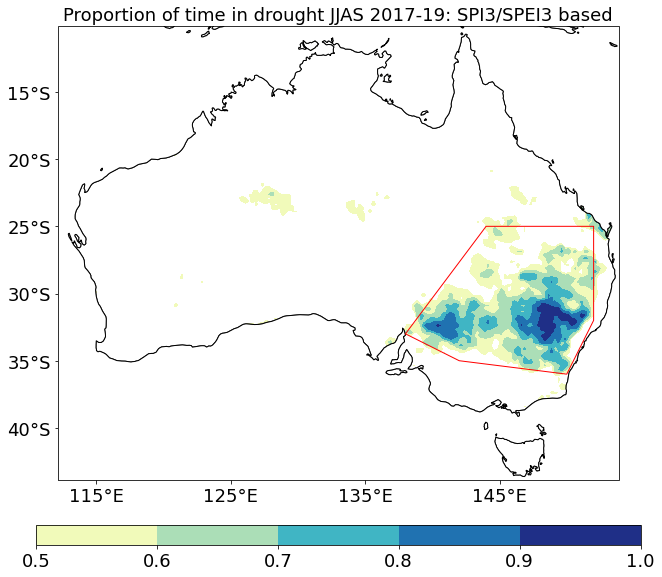

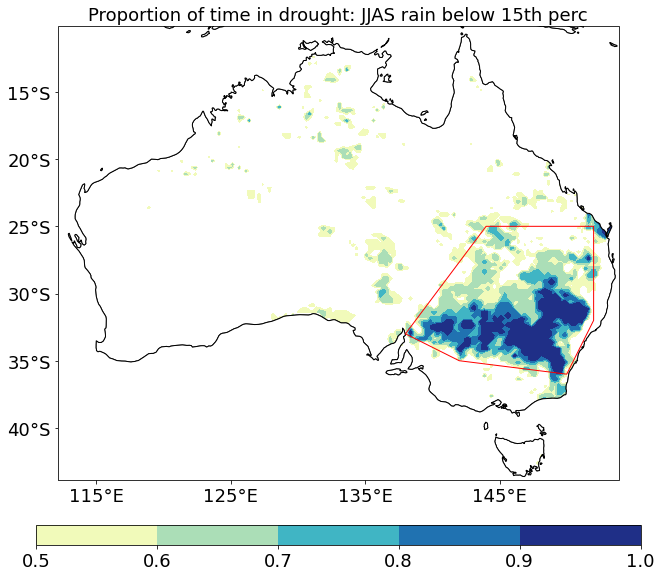

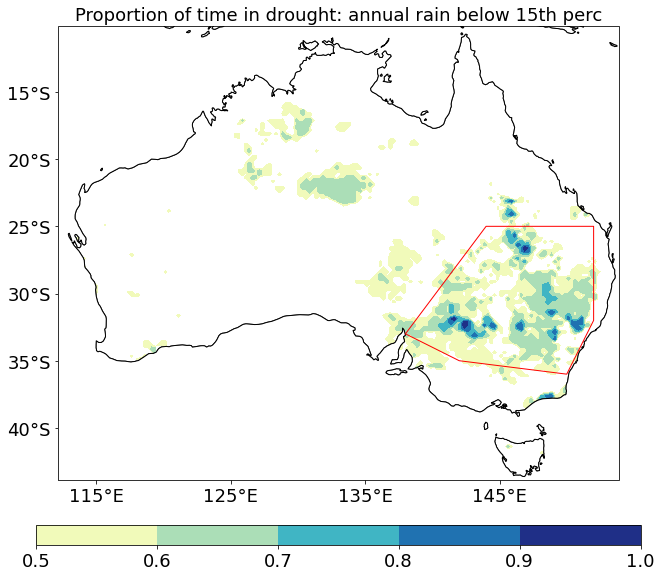

In [11]:
out_dir = 'figures/drought_2017to2020/drought_area_definition/'
levels = [0.3, 0.4, 0.5, 0.6, 0.7]
draw_spatial_plot_addsh(count_dry_spi_spei/(12*3), cmap='YlGnBu', levels=levels, shapefile = outfp, 
                        main_title='Proportion of time in drought 2017-2019: SPI3/SPEI3 based, all months', 
                  out_dir = out_dir, out_figname='mean_proportion_spi_spei_based_all_months_option3.png')
levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
draw_spatial_plot_addsh(count_dry_spi_spei_JJAS/(4*3), cmap='YlGnBu', levels=levels, shapefile = outfp,
                  main_title='Proportion of time in drought JJAS 2017-19: SPI3/SPEI3 based', 
                  out_dir = out_dir, out_figname='mean_proportion_spi_spei_based_JJAS_option3.png')
levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
draw_spatial_plot_addsh(JJAS_rain_below_15perc/3, cmap='YlGnBu', levels=levels, shapefile = outfp,
                  main_title='Proportion of time in drought: JJAS rain below 15th perc', 
                  out_dir = out_dir, out_figname='JJAS_rain_below_15_perc_option3.png')
levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
draw_spatial_plot_addsh(annual_rain_below_15perc/3, cmap='YlGnBu', levels=levels, shapefile = outfp,
                  main_title='Proportion of time in drought: annual rain below 15th perc', 
                  out_dir = out_dir, out_figname='annual_rain_below_15_perc_option3.png')

### Check soil moisture with option 3

In [8]:
%who

JJAS_rain_below_15perc	 LATITUDE_FORMATTER	 LONGITUDE_FORMATTER	 Point	 Polygon	 add_cyclic_point	 agcd_info	 alldata_dict	 annual_rain_below_10perc	 
annual_rain_below_15perc	 awra_info	 ccrs	 cfeature	 chirps_info	 count_dry_spi_spei	 count_dry_spi_spei_JJAS	 cticker	 data_dir	 
draw_spatial_plot	 draw_spatial_plot_12panels	 draw_spatial_plot_3panels	 draw_spatial_plot_addcontours	 draw_spatial_plot_addsh	 esacci_info	 get_da	 get_da_simple	 gleam_info	 
glob	 gpd	 handle	 mswep_info	 mticker	 myfunc	 new_path	 np	 out_dir	 
outfp	 pd	 pickle	 plt	 regrid_all_from_list	 save_monthly_data	 save_monthly_data_byyear	 sys	 xe	 
xr	 


In [7]:
# Import necessary modules first
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Determine the output path for the Shapefile
outfp = "/g/data/w97/ad9701/drought_2017to2020/drought_focusArea/drought_focusArea_option3.shp"

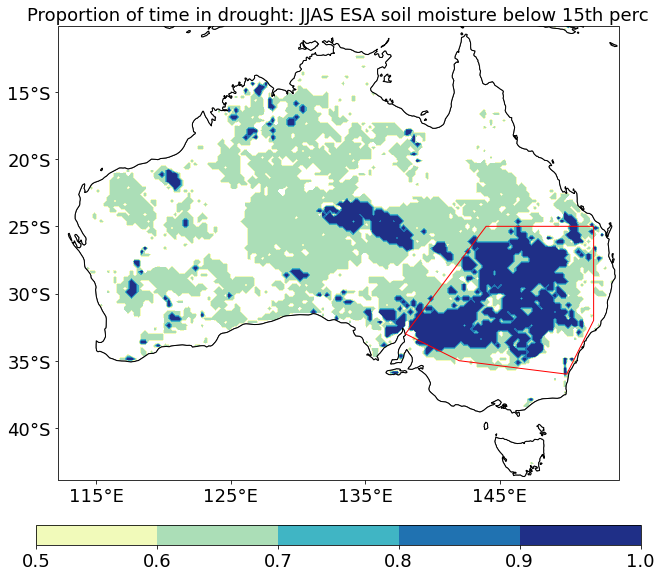

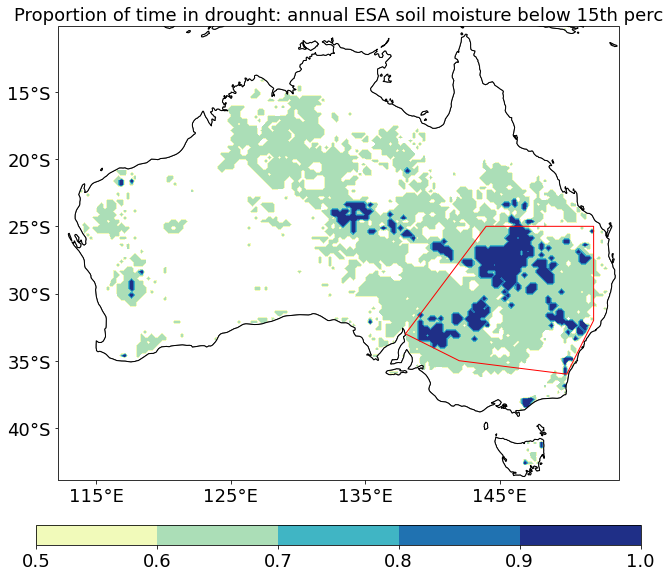

In [13]:
out_dir = 'figures/drought_2017to2020/drought_area_definition/'

levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
draw_spatial_plot_addsh(JJAS_sm_below_15perc/3, cmap='YlGnBu', levels=levels, shapefile = outfp,
                  main_title='Proportion of time in drought: JJAS ESA soil moisture below 15th perc', 
                  out_dir = out_dir, out_figname='JJAS_soil_moisture_below_15_perc_option3.png')
levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
draw_spatial_plot_addsh(annual_sm_below_15perc/3, cmap='YlGnBu', levels=levels, shapefile = outfp,
                  main_title='Proportion of time in drought: annual ESA soil moisture below 15th perc', 
                  out_dir = out_dir, out_figname='annual_soil_moisture_below_15_perc_option3.png')

## A contour based region

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import glob
import matplotlib.pyplot as plt
import pickle
import geopandas as gpd
from shapely.geometry import Point, Polygon

%run -i drought_2017to2019/dataInfo_and_functions.py

import sys
new_path = '/home/566/ad9701/drought_probability/final_code_AU/'
if new_path not in sys.path:
    sys.path.append(new_path)
import validation_functions as myfunc

import matplotlib.pyplot as plt

TINY_SIZE = 14
SMALL_SIZE = 18
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=TINY_SIZE)           # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=TINY_SIZE)     # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# get all drought criteria datasets

data_dir = '/g/data/w97/ad9701/drought_2017to2020/drought_focusArea/'
out_dir = 'figures/drought_2017to2020/drought_area_definition/'

with open(data_dir + 'annual_rain_below_10perc.pickle', 'rb') as handle:
    annual_rain_below_10perc = pickle.load(handle)
    
with open(data_dir + 'annual_rain_below_15perc.pickle', 'rb') as handle:
    annual_rain_below_15perc = pickle.load(handle)
    
with open(data_dir + 'mean_count_dry_months_spi_spei.pickle', 'rb') as handle:
    count_dry_spi_spei = pickle.load(handle)
    
with open(data_dir + 'mean_count_dry_months_JJAS_spi_spei.pickle', 'rb') as handle:
    count_dry_spi_spei_JJAS = pickle.load(handle)
    
with open(data_dir + 'JJASseas_rain_15perc.pickle', 'rb') as handle:
    JJAS_rain_below_15perc = pickle.load(handle)
    
with open(data_dir + 'annual_soil_moisture_below_15perc.pickle', 'rb') as handle:
    annual_sm_below_15perc = pickle.load(handle)
    
with open(data_dir + 'JJASseas_soil_moisture_15perc.pickle', 'rb') as handle:
    JJAS_sm_below_15perc = pickle.load(handle)
    
with open(data_dir + 'annual_soil_moisture_below_15perc.pickle', 'rb') as handle:
    annual_sm_below_15perc = pickle.load(handle)
    
with open(data_dir + 'JJASseas_soil_moisture_15perc.pickle', 'rb') as handle:
    JJAS_sm_below_15perc = pickle.load(handle)

Text(0.5, 1.0, 'contour figure with Nlevels=[0.3]')

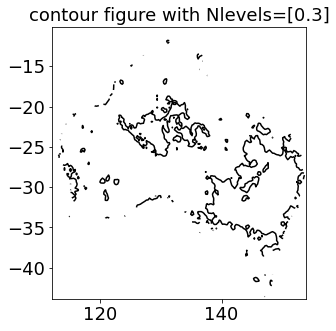

In [63]:
from shapely import geometry
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import fiona
import os,json
from descartes.patch import PolygonPatch

# select a data to contour basedon

da = count_dry_spi_spei/(12*3)
da_val = da.values

# create some test data with multiple peaks
# lon = np.linspace(0,45,100)
# lat = np.linspace(-20,32,90)
# long,latg=np.meshgrid(lon,lat)
# C1=np.sqrt((long-5.)**2+(latg-25)**2)/30.
# C2=np.sqrt((long-30.)**2+(latg-1)**2)/10.
# m = 30*np.exp(-C1**2)+20.*np.exp(-C2**2)

# make the contourf plot, storing the resulting ContourSet in cs
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
Nlevels=[0.3] #, 0.6, 0.7, 0.8, 0.9, 1]
cs = plt.contour(da.lon.values,da.lat.values,da.values,Nlevels,cmap='gist_heat')
plt.title('contour figure with Nlevels='+str(Nlevels))

### Get only the polygon object corresponding to a contour level of 5

In [64]:
# create lookup table for levels
lvl_lookup = dict(zip(cs.collections, cs.levels))

# loop over collections (and polygons in each collection), store in list for fiona
PolyList=[]
for col in [cs.collections[0]]:
    z=lvl_lookup[col] # the value of this level
    for contour_path in col.get_paths():
        # create the polygon for this level
        for ncp,cp in enumerate(contour_path.to_polygons()):
            lons = cp[:,0]
            lats = cp[:,1]
            new_shape = geometry.Polygon([(i[0], i[1]) for i in zip(lons,lats)])
            if ncp == 0:                
                poly = new_shape # first shape
            else:
                poly = poly.difference(new_shape) # Remove the holes
            
            PolyList.append({'poly':poly,'props':{'z': z}})


In [4]:
# # define ESRI schema, write the polygon to the file
# outfi=os.path.join(data_dir,'polygon_drought_focusArea_basedOn_JJAS_SPI3_SPEI3.shp')
# schema = {'geometry': 'Polygon','properties': {'z': 'float'}}
# with fiona.collection(outfi, "w", "ESRI Shapefile", schema) as output:
#     for p in PolyList:
#         output.write({'properties': p['props'],
#             'geometry': geometry.mapping(p['poly'])})

##### Alternate way to above commented code

In [14]:
ployLen_sort = np.sort(polyLength)

In [65]:
polyLength = []
for i in range(0, len(PolyList)):
    polyLength.append(PolyList[i]['poly'].length)
polyLength = np.array(polyLength)
indMax = np.where(polyLength == polyLength.max())

polySel2 = PolyList[indMax[0][0]]['poly']
polySel2_simple = PolyList[indMax[0][0]]['poly'].simplify(tolerance = 0.2)

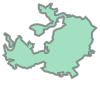

In [43]:
polySel

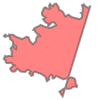

In [68]:
polySel2#.buffer(0)

In [72]:
polySel3 = polySel2.buffer(0)[1]

/local/zv2/ad9701/tmp/ipykernel_979138/1758478356.py:1: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polySel3 = polySel2.buffer(0)[1]


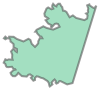

In [73]:
polySel3

In [28]:
import numpy as np
import shapely.geometry as sg

def get_angles(vec_1,vec_2):
    """
    return the angle, in degrees, between two vectors
    """
    
    dot = np.dot(vec_1, vec_2)
    det = np.cross(vec_1,vec_2)
    angle_in_rad = np.arctan2(det,dot)
    return np.degrees(angle_in_rad)


def simplify_by_angle(poly_in, deg_tol = 1):
    """
    try to remove persistent coordinate points that remain after
    simplify, convex hull, or something, etc. with some trig instead
    params:
    poly_in: shapely Polygon 
    deg_tol: degree tolerance for comparison between successive vectors
    return: 'simplified' polygon
    
    """
    
    ext_poly_coords = poly_in.exterior.coords[:]
    vector_rep = np.diff(ext_poly_coords,axis = 0)
    angles_list = []
    for i in range(0,len(vector_rep) -1 ):
        angles_list.append(np.abs(get_angles(vector_rep[i],vector_rep[i+1])))
    
#   get mask satisfying tolerance
    thresh_vals_by_deg = np.where(np.array(angles_list) > deg_tol)
    
#   gotta be a better way to do this next part
#   sandwich betweens first and last points
    new_idx = [0] + (thresh_vals_by_deg[0] + 1).tolist() + [0]
    new_vertices = [ext_poly_coords[idx] for idx in new_idx]
    

    return sg.Polygon(new_vertices)

In [31]:
polySel_simple = simplify_by_angle(polySel, deg_tol = 5)

In [45]:
list(polySel.exterior.coords)

[(152.625, -32.01388163168737),
 (152.375, -32.037207929647685),
 (152.125, -31.770236025571087),
 (151.86618628432947, -31.875),
 (151.875, -32.18636061896374),
 (152.125, -32.1762811215067),
 (152.21913556383737, -32.375),
 (152.125, -32.48165243718536),
 (151.2237094361034, -32.375),
 (150.875, -32.82143385165723),
 (150.0140328646463, -33.375),
 (150.125, -33.637097793279516),
 (150.31655588398803, -33.875),
 (150.125, -34.13979040919755),
 (149.875, -34.27884830356332),
 (149.625, -34.26998049249157),
 (149.417776764473, -34.375),
 (149.875, -34.97181815388501),
 (150.06703134091052, -35.125),
 (150.1170405138198, -35.375),
 (149.25287398535926, -35.875),
 (148.875, -35.121179121477475),
 (148.625, -35.03457968893452),
 (148.4646368343341, -35.125),
 (148.57267682168958, -35.375),
 (148.375, -35.42747007745731),
 (147.81417423473147, -35.375),
 (147.875, -35.30467264314596),
 (147.95270628735773, -35.125),
 (147.875, -35.00999182583068),
 (147.11331757998002, -35.125),
 (147.125, 

In [46]:
list(polySel2.exterior.coords)

[(146.9175134247897, -38.625),
 (146.39730397498127, -37.875),
 (146.74532147617347, -37.625),
 (147.375, -37.247978209195516),
 (147.625, -37.428782501903086),
 (148.22794026606022, -37.375),
 (148.55833754129503, -37.125),
 (148.875, -37.03360268926946),
 (149.21414036833335, -37.125),
 (149.2545192581907, -36.875),
 (149.04353928885112, -36.625),
 (149.00250195609206, -36.125),
 (148.875, -35.78066642047619),
 (148.375, -35.53858385540639),
 (147.00655170499942, -35.875),
 (145.999935670269, -35.375),
 (145.8250239053416, -35.375),
 (145.625, -35.64187085911214),
 (145.375, -35.7556383364315),
 (145.25475750537842, -35.625),
 (145.2936971681322, -35.375),
 (145.09723173204654, -35.125),
 (144.81992714257197, -35.375),
 (144.63606551164156, -35.625),
 (144.77394094723542, -35.875),
 (144.375, -36.190790317763685),
 (144.32916486151805, -36.125),
 (144.20667118837758, -35.625),
 (144.02899555898762, -35.375),
 (143.375, -34.95754763829759),
 (143.04850718182018, -34.875),
 (142.625, -

In [76]:
from shapely.ops import unary_union
polygons = [polySel, polySel3]
polySel_merge = unary_union(polygons)

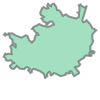

In [77]:
polySel_merge

In [83]:
# Import necessary modules first
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Create an empty geopandas GeoDataFrame
newdata = gpd.GeoDataFrame()

# Let's see what we have at the moment
print(newdata)

# Create a new column called 'geometry' to the GeoDataFrame
newdata['geometry'] = None

# Insert the polygon into 'geometry' -column at index 0
newdata.loc[0, 'geometry'] = polySel_merge
# Add a new column and insert data
newdata.loc[0, 'location'] = 'Region in drought'
newdata.loc[0, 'basis'] = 'all mon SPI3/SPEI3'
newdata.loc[0, 'propTime'] = '>=0.3'

# Let's check the data
# print(newdata)

Empty GeoDataFrame
Columns: []
Index: []


In [84]:
# Import specific function 'from_epsg' from fiona module
from fiona.crs import from_epsg

# Set the GeoDataFrame's coordinate system to WGS84 (i.e. epsg code 4326)
newdata.crs = from_epsg(4326)

# Let's see how the crs definition looks like
print(newdata.crs)

+init=epsg:4326 +no_defs +type=crs


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [85]:
# Determine the output path for the Shapefile
outfp = "/g/data/w97/ad9701/drought_2017to2020/drought_focusArea/polygon_drought_focusArea_basedOn_SPI3_SPEI3.shp"

# Write the data into that Shapefile
newdata.to_file(outfp)

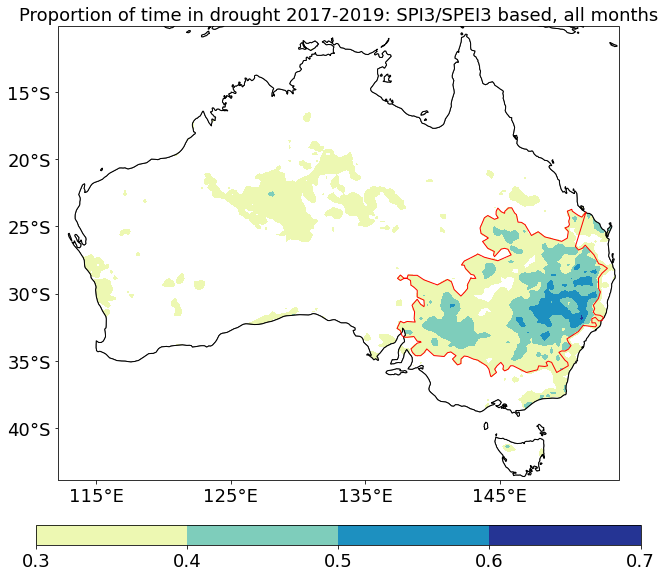

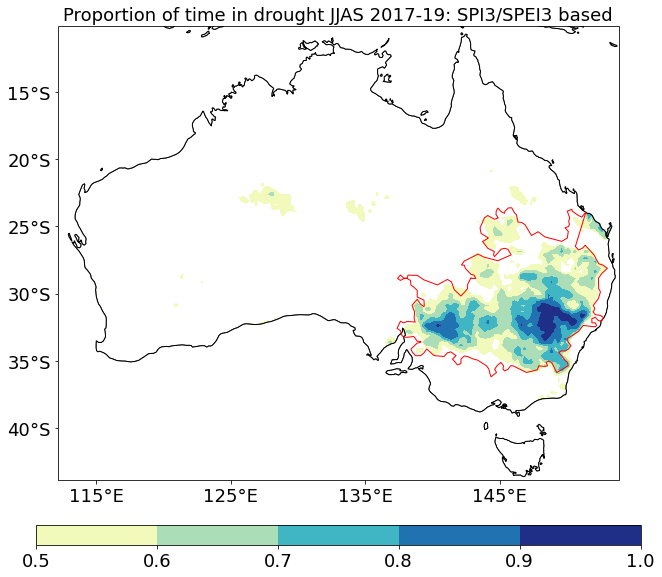

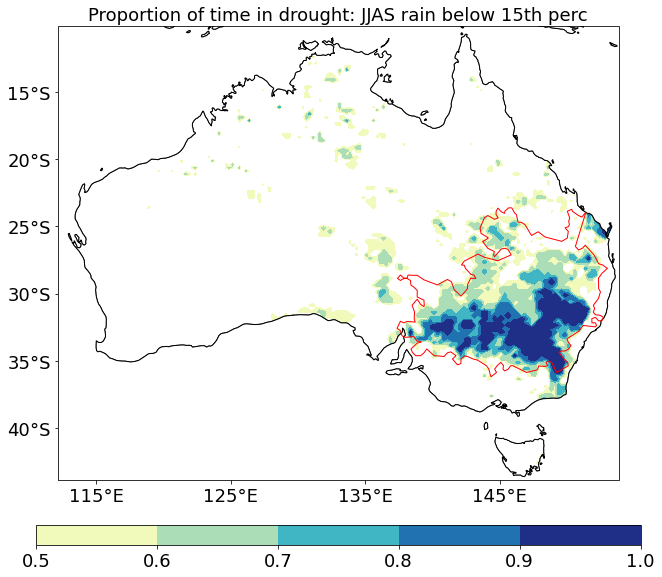

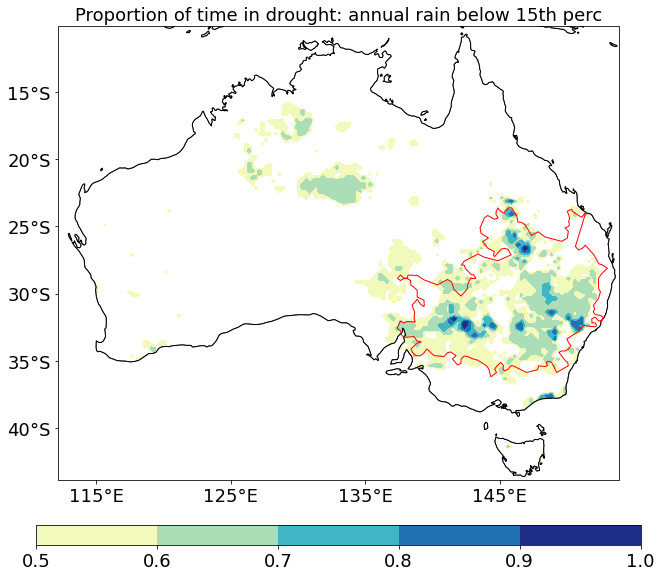

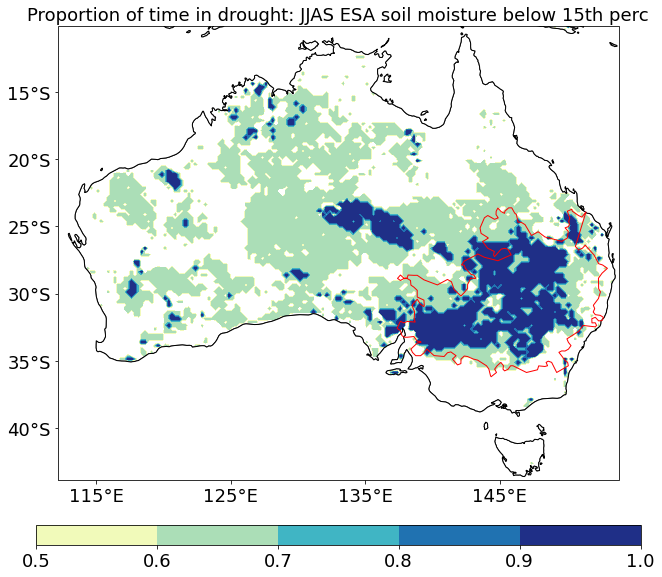

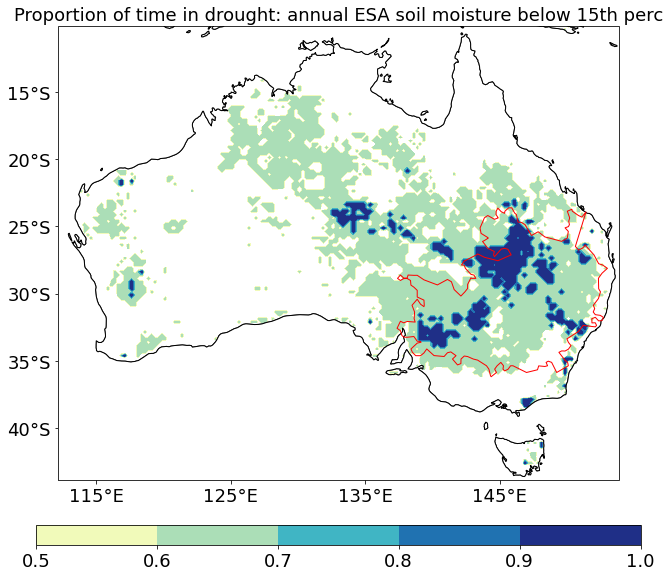

In [4]:
outfi = '/g/data/w97/ad9701/drought_2017to2020/drought_focusArea/polygon_drought_focusArea_basedOn_SPI3_SPEI3.shp'
suffix = 'polygon1'

out_dir = 'figures/drought_2017to2020/drought_area_definition/'
levels = [0.3, 0.4, 0.5, 0.6, 0.7]
draw_spatial_plot_addsh(count_dry_spi_spei/(12*3), cmap='YlGnBu', levels=levels, shapefile = outfi, 
                        main_title='Proportion of time in drought 2017-2019: SPI3/SPEI3 based, all months', 
                  out_dir = out_dir, out_figname='mean_proportion_spi_spei_based_all_months_' + suffix + '.png')
levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
draw_spatial_plot_addsh(count_dry_spi_spei_JJAS/(4*3), cmap='YlGnBu', levels=levels, shapefile = outfi,
                  main_title='Proportion of time in drought JJAS 2017-19: SPI3/SPEI3 based', 
                  out_dir = out_dir, out_figname='mean_proportion_spi_spei_based_JJAS_' + suffix + '.png')
levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
draw_spatial_plot_addsh(JJAS_rain_below_15perc/3, cmap='YlGnBu', levels=levels, shapefile = outfi,
                  main_title='Proportion of time in drought: JJAS rain below 15th perc', 
                  out_dir = out_dir, out_figname='JJAS_rain_below_15_perc_' + suffix + '.png')
levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
draw_spatial_plot_addsh(annual_rain_below_15perc/3, cmap='YlGnBu', levels=levels, shapefile = outfi,
                  main_title='Proportion of time in drought: annual rain below 15th perc', 
                  out_dir = out_dir, out_figname='annual_rain_below_15_perc_' + suffix + '.png')
levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
draw_spatial_plot_addsh(JJAS_sm_below_15perc/3, cmap='YlGnBu', levels=levels, shapefile = outfi,
                  main_title='Proportion of time in drought: JJAS ESA soil moisture below 15th perc', 
                  out_dir = out_dir, out_figname='JJAS_soil_moisture_below_15_perc_' + suffix + '.png')
levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
draw_spatial_plot_addsh(annual_sm_below_15perc/3, cmap='YlGnBu', levels=levels, shapefile = outfi,
                  main_title='Proportion of time in drought: annual ESA soil moisture below 15th perc', 
                  out_dir = out_dir, out_figname='annual_soil_moisture_below_15_perc_' + suffix + '.png')

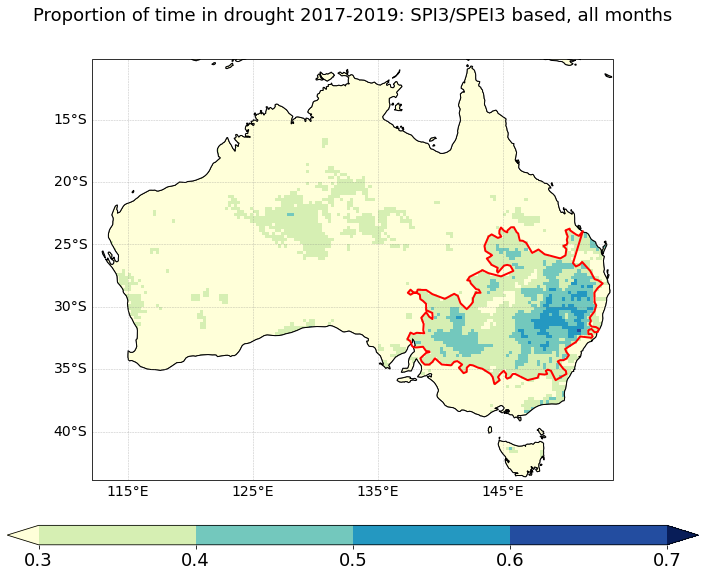

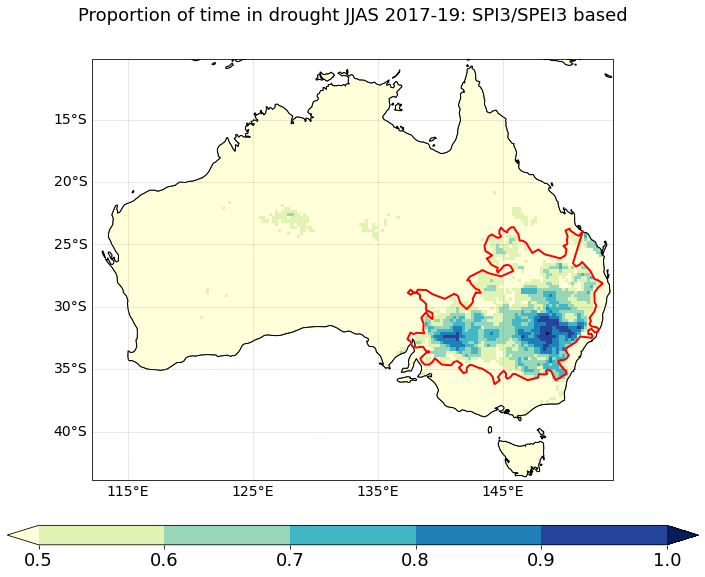

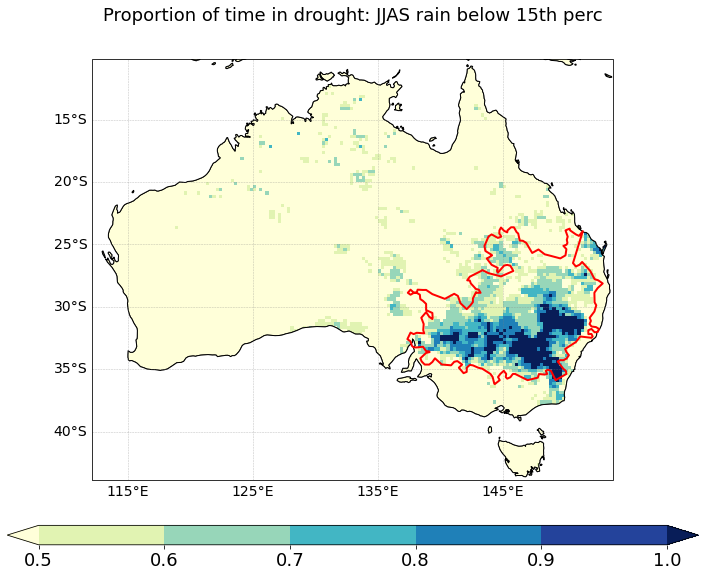

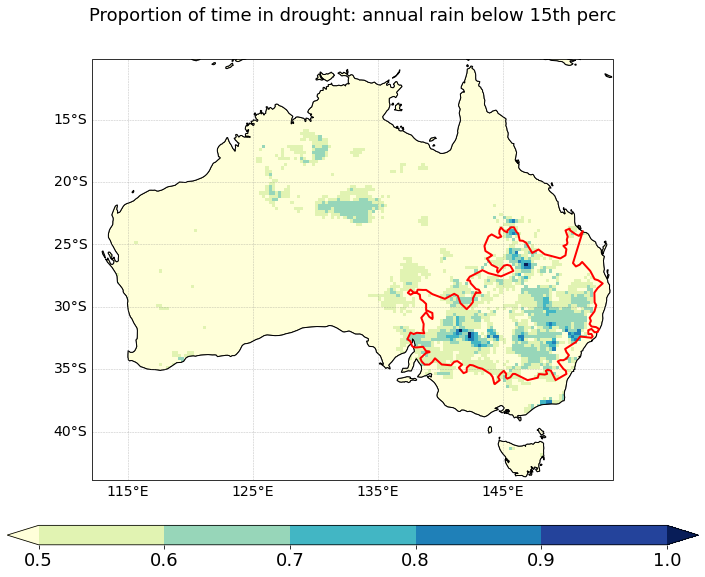

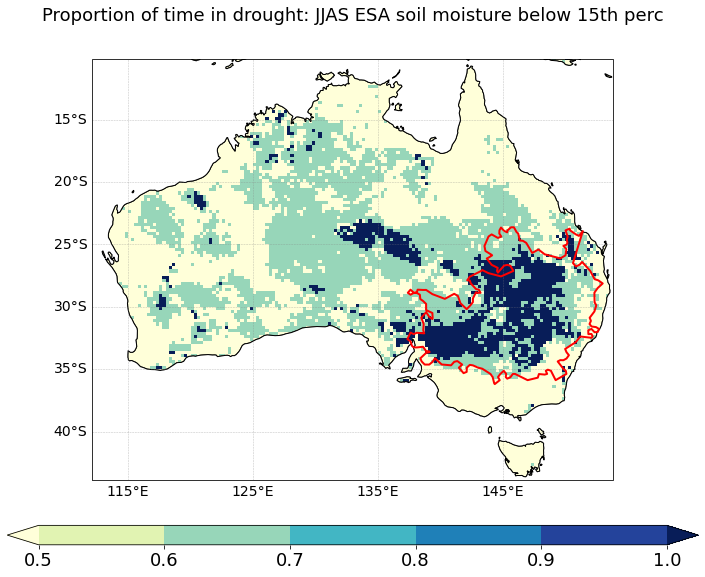

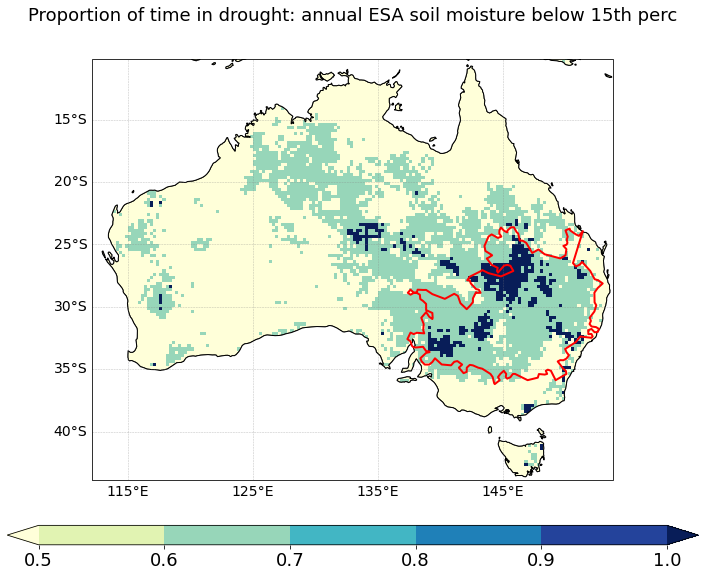

In [5]:
cmap = 'YlGnBu'
ncols = 1
nrows = 1
shCol = 'red'

suffix = 'polygon1'

out_dir = 'figures/drought_2017to2020/drought_area_definition/'
levels = [0.3, 0.4, 0.5, 0.6, 0.7]
myfunc.draw_pcolormesh_Npanels([count_dry_spi_spei/(12*3)], cmap = cmap, levels = levels, ncols = ncols, nrows = nrows, panel_width=12, panel_height=9,
                               shapefile = outfi, shapefile_color=shCol,cbar_extend='both',
                               main_title='Proportion of time in drought 2017-2019: SPI3/SPEI3 based, all months', 
                               out_dir = out_dir, out_figname='mean_proportion_spi_spei_based_all_months_' + suffix + '.png')
levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
myfunc.draw_pcolormesh_Npanels([count_dry_spi_spei_JJAS/(4*3)], cmap = cmap, levels = levels, ncols = ncols, nrows = nrows, panel_width=12, panel_height=9,
                               shapefile = outfi, shapefile_color=shCol,cbar_extend='both',
                               main_title='Proportion of time in drought JJAS 2017-19: SPI3/SPEI3 based', 
                               out_dir = out_dir, out_figname='mean_proportion_spi_spei_based_JJAS_' + suffix + '.png')
levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
myfunc.draw_pcolormesh_Npanels([JJAS_rain_below_15perc/3], cmap = cmap, levels = levels, ncols = ncols, nrows = nrows, panel_width=12, panel_height=9,
                               shapefile = outfi, shapefile_color=shCol,cbar_extend='both',
                               main_title='Proportion of time in drought: JJAS rain below 15th perc', 
                               out_dir = out_dir, out_figname='JJAS_rain_below_15_perc_' + suffix + '.png')
levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
myfunc.draw_pcolormesh_Npanels([annual_rain_below_15perc/3], cmap = cmap, levels = levels, ncols = ncols, nrows = nrows, panel_width=12, panel_height=9,
                               shapefile = outfi, shapefile_color=shCol,cbar_extend='both',
                               main_title='Proportion of time in drought: annual rain below 15th perc', 
                               out_dir = out_dir, out_figname='annual_rain_below_15_perc_' + suffix + '.png')
levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
myfunc.draw_pcolormesh_Npanels([JJAS_sm_below_15perc/3], cmap = cmap, levels = levels, ncols = ncols, nrows = nrows, panel_width=12, panel_height=9,
                               shapefile = outfi, shapefile_color=shCol,cbar_extend='both',
                               main_title='Proportion of time in drought: JJAS ESA soil moisture below 15th perc', 
                               out_dir = out_dir, out_figname='JJAS_soil_moisture_below_15_perc_' + suffix + '.png')
levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
myfunc.draw_pcolormesh_Npanels([annual_sm_below_15perc/3], cmap = cmap, levels = levels, ncols = ncols, nrows = nrows, panel_width=12, panel_height=9,
                               shapefile = outfi, shapefile_color=shCol,cbar_extend='both',
                               main_title='Proportion of time in drought: annual ESA soil moisture below 15th perc', 
                               out_dir = out_dir, out_figname='annual_soil_moisture_below_15_perc_' + suffix + '.png')

# levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
# draw_spatial_plot_addsh(count_dry_spi_spei_JJAS/(4*3), cmap='YlGnBu', levels=levels, shapefile = outfi,
#                   main_title='Proportion of time in drought JJAS 2017-19: SPI3/SPEI3 based', 
#                   out_dir = out_dir, out_figname='mean_proportion_spi_spei_based_JJAS_polygon.png')
# levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
# draw_spatial_plot_addsh(JJAS_rain_below_15perc/3, cmap='YlGnBu', levels=levels, shapefile = outfi,
#                   main_title='Proportion of time in drought: JJAS rain below 15th perc', 
#                   out_dir = out_dir, out_figname='JJAS_rain_below_15_perc_polygon.png')
# levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
# draw_spatial_plot_addsh(annual_rain_below_15perc/3, cmap='YlGnBu', levels=levels, shapefile = outfi,
#                   main_title='Proportion of time in drought: annual rain below 15th perc', 
#                   out_dir = out_dir, out_figname='annual_rain_below_15_perc_polygon.png')
# levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
# draw_spatial_plot_addsh(JJAS_sm_below_15perc/3, cmap='YlGnBu', levels=levels, shapefile = outfi,
#                   main_title='Proportion of time in drought: JJAS ESA soil moisture below 15th perc', 
#                   out_dir = out_dir, out_figname='JJAS_soil_moisture_below_15_perc_polygon.png')
# levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
# draw_spatial_plot_addsh(annual_sm_below_15perc/3, cmap='YlGnBu', levels=levels, shapefile = outfi,
#                   main_title='Proportion of time in drought: annual ESA soil moisture below 15th perc', 
#                   out_dir = out_dir, out_figname='annual_soil_moisture_below_15_perc_polygon.png')

In [3]:
import geopandas as gpd
import os

data_dir = '/g/data/w97/ad9701/drought_2017to2020/drought_focusArea/'
outfi=os.path.join(data_dir,'polygon_drought_focusArea_basedOn_JJAS_SPI3_SPEI3.shp')
# Read file using gpd.read_file()
data = gpd.read_file(outfi)
#%matplotlib inline
#data.plot() #aspect=1)

In [5]:
data['geometry']

0     POLYGON ((131.12500 -11.82305, 131.37500 -11.8...
1     POLYGON ((136.12500 -13.54953, 136.37500 -13.6...
2     POLYGON ((121.43711 -19.12500, 121.37500 -19.1...
3     POLYGON ((119.37500 -19.87500, 119.50000 -19.8...
4     POLYGON ((144.37500 -20.83834, 144.47683 -20.8...
                            ...                        
76    POLYGON ((149.62500 -36.72501, 149.87500 -36.7...
77    POLYGON ((148.87500 -37.31699, 149.12500 -37.3...
78    POLYGON ((148.12500 -37.61334, 148.19116 -37.6...
79    POLYGON ((148.62500 -37.55865, 148.70522 -37.6...
80    POLYGON ((146.87500 -38.36942, 146.90288 -38.3...
Name: geometry, Length: 81, dtype: geometry

In [ ]:
myfunc.draw_pcolormesh_Npanels

<function validation_functions.draw_pcolormesh_Npanels(ds_list, cmap='viridis', levels=None, ncols=5, nrows=2, subplot_title=None, main_title=None, out_dir=None, out_figname=None, fig_format='png', add_cbar=True, cbar_extend='both', cbar_label='', panel_width=3.66, panel_height=4, xticks=array([115, 125, 135, 145]), yticks=array([-40, -35, -30, -25, -20, -15]), shapefile=None, shapefile_color='black', ds_hatch_list=None)>

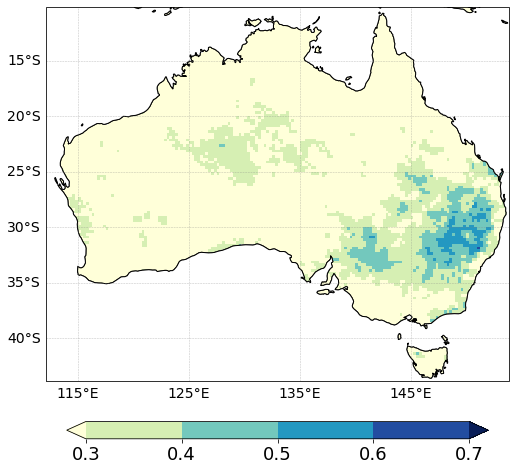

In [ ]:
levels = [0.3, 0.4, 0.5, 0.6, 0.7]
plot_list = [count_dry_spi_spei/(12*3)]
cmap = 'YlGnBu'
ncols = 1
nrows = 1

myfunc.draw_pcolormesh_Npanels(ds_list = plot_list, cmap = cmap, levels = levels, ncols = ncols, nrows = nrows, panel_width=3.66*2, panel_height=4*2)

### A smoothened polygon

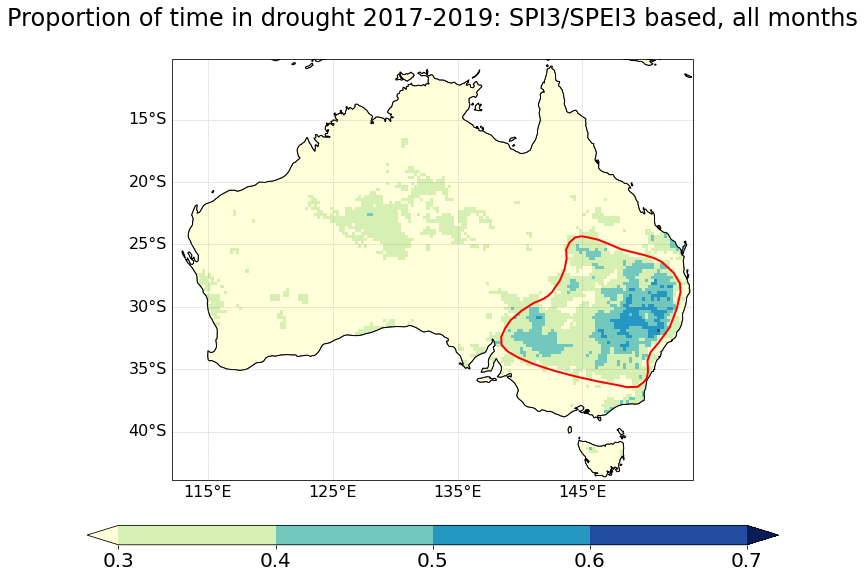

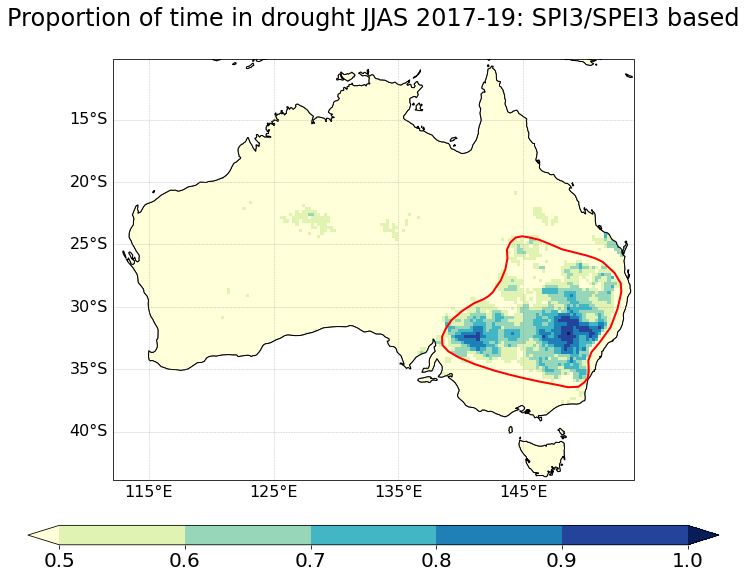

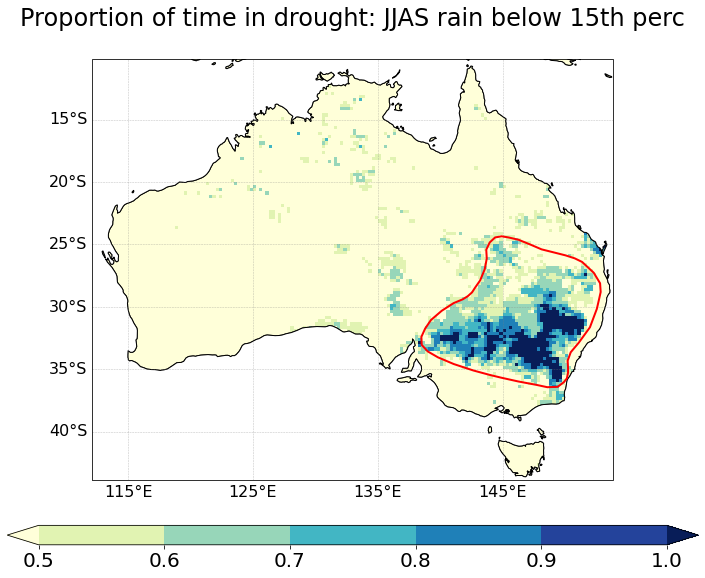

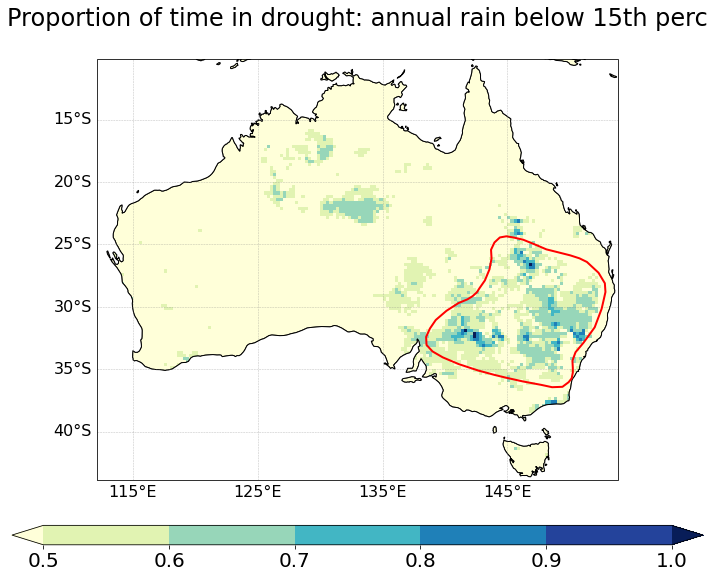

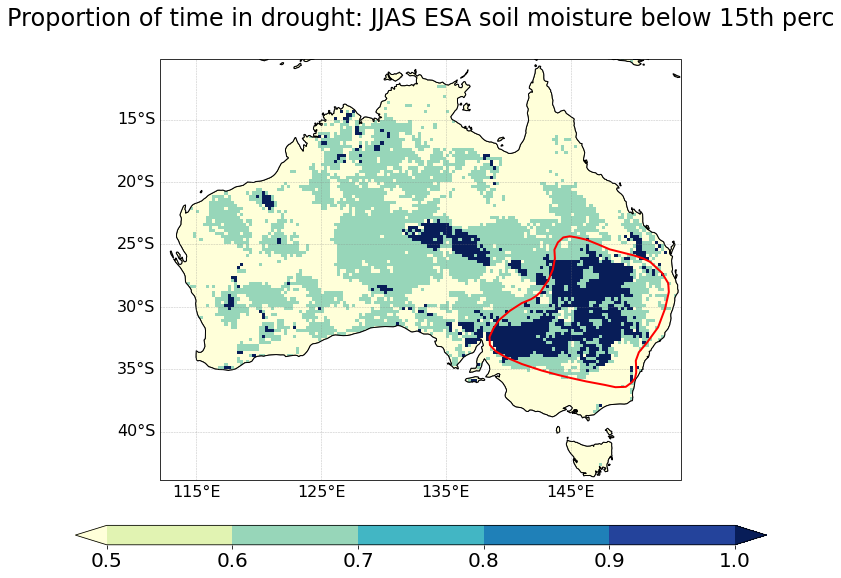

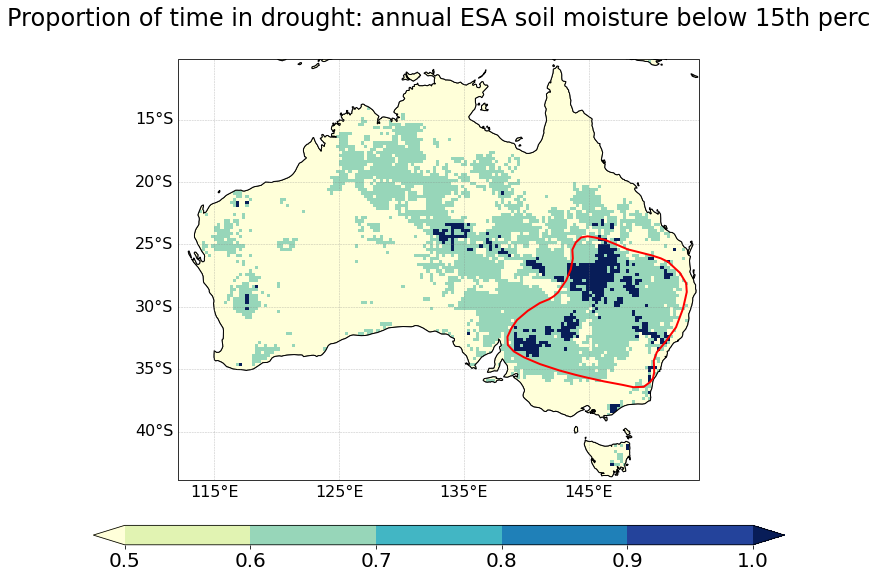

In [16]:
cmap = 'YlGnBu'
ncols = 1
nrows = 1
shCol = 'red'
outfi = '/g/data/w97/ad9701/drought_2017to2020/drought_focusArea/smooth_polygon_drought_focusArea.shp'

suffix = 'smooth_polygon'

out_dir = 'figures/drought_2017to2020/drought_area_definition/'
levels = [0.3, 0.4, 0.5, 0.6, 0.7]
myfunc.draw_pcolormesh_Npanels([count_dry_spi_spei/(12*3)], cmap = cmap, levels = levels, ncols = ncols, nrows = nrows, panel_width=12, panel_height=9,
                               shapefile = outfi, shapefile_color=shCol,cbar_extend='both',
                               main_title='Proportion of time in drought 2017-2019: SPI3/SPEI3 based, all months', 
                               out_dir = out_dir, out_figname='mean_proportion_spi_spei_based_all_months_' + suffix + '.png')
levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
myfunc.draw_pcolormesh_Npanels([count_dry_spi_spei_JJAS/(4*3)], cmap = cmap, levels = levels, ncols = ncols, nrows = nrows, panel_width=12, panel_height=9,
                               shapefile = outfi, shapefile_color=shCol,cbar_extend='both',
                               main_title='Proportion of time in drought JJAS 2017-19: SPI3/SPEI3 based', 
                               out_dir = out_dir, out_figname='mean_proportion_spi_spei_based_JJAS_' + suffix + '.png')
levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
myfunc.draw_pcolormesh_Npanels([JJAS_rain_below_15perc/3], cmap = cmap, levels = levels, ncols = ncols, nrows = nrows, panel_width=12, panel_height=9,
                               shapefile = outfi, shapefile_color=shCol,cbar_extend='both',
                               main_title='Proportion of time in drought: JJAS rain below 15th perc', 
                               out_dir = out_dir, out_figname='JJAS_rain_below_15_perc_' + suffix + '.png')
levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
myfunc.draw_pcolormesh_Npanels([annual_rain_below_15perc/3], cmap = cmap, levels = levels, ncols = ncols, nrows = nrows, panel_width=12, panel_height=9,
                               shapefile = outfi, shapefile_color=shCol,cbar_extend='both',
                               main_title='Proportion of time in drought: annual rain below 15th perc', 
                               out_dir = out_dir, out_figname='annual_rain_below_15_perc_' + suffix + '.png')
levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
myfunc.draw_pcolormesh_Npanels([JJAS_sm_below_15perc/3], cmap = cmap, levels = levels, ncols = ncols, nrows = nrows, panel_width=12, panel_height=9,
                               shapefile = outfi, shapefile_color=shCol,cbar_extend='both',
                               main_title='Proportion of time in drought: JJAS ESA soil moisture below 15th perc', 
                               out_dir = out_dir, out_figname='JJAS_soil_moisture_below_15_perc_' + suffix + '.png')
levels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
myfunc.draw_pcolormesh_Npanels([annual_sm_below_15perc/3], cmap = cmap, levels = levels, ncols = ncols, nrows = nrows, panel_width=12, panel_height=9,
                               shapefile = outfi, shapefile_color=shCol,cbar_extend='both',
                               main_title='Proportion of time in drought: annual ESA soil moisture below 15th perc', 
                               out_dir = out_dir, out_figname='annual_soil_moisture_below_15_perc_' + suffix + '.png')